# Final Project Report

* Class: DS 5100
* Student Name: Jack Burke
* Student Net ID: jpb2uj
* This URL: https://github.com/jackburke12/ds5100_final_project/blob/4541410ff554e9b18553555d02d5a75af56878d1/DS5100_Final_Project_jpb2uj.ipynb


# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/jackburke12/ds5100_final_project.git

Paste a copy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```
import numpy as np
import pandas as pd

class Die:
    '''
    A class to create a die with customizable faces and weights. This die can be rolled, and each face has a weight 
    that affects the likelihood of it appearing in a roll. Faces can be strings or numbers, and weights can be positive 
    numbers, including zero. Weights default to 1 if not specified.
    '''
    def __init__(self, faces):
        '''
        PURPOSE: Create a die object with any number of faces.
        INPUTS: 
        faces: numpy array containing strings or numpy array containing numbers

        OUTPUTS:
        face_weights: dataframe containing the weight for each face on the die.

        RETURNS:
        none
        '''
        if not isinstance(faces, np.ndarray):
            raise TypeError("Expected a numpy array for 'faces', but received something else.")
        if not (np.issubdtype(faces.dtype, np.str_) or np.issubdtype(faces.dtype, np.number)):
            raise TypeError("The faces array must contain all strings or all integers. Your array is of type "+str(faces.dtype))
        if len(faces) != len(np.unique(faces)):
            raise ValueError("All faces must be unique.")
        
        self.face_weights = pd.DataFrame({'faces': faces, 'weights': 1.0})
        self.face_weights.set_index('faces', inplace=True)

    def change_face_weight(self, face, weight):
        '''
        PURPOSE: Customize the weights of the faces on an existing die object.

        INPUTS: 
        face: string or int. Will raise IndexError if the face provided is not present in the die's index of faces.
        weight: float or int. Must be positive.

        OUTPUTS:
        Changes the face_weights attribute to reflect the inputted weight.

        RETURNS:
        none
        
        '''
        if face not in self.face_weights.index:
            raise IndexError("The face whose weight you wish to change is not on the die. Valid faces are: "+ str(self.face_weights.index.to_list()))
        if not isinstance(weight, (int, float)):
            raise TypeError("Only integers or floats can be used as face weights.")
        if weight < 0:
            raise ValueError("Face weights must be positive.")
        self.face_weights.loc[face,'weights'] = weight

    def roll_die(self, num_rolls = 1):
        '''
        PURPOSE: Roll the die the specified number of times and return the results of the rolls. For example, if a standard six-sided die was rolled 3 times, the output could look like this: [2,4,3].

        INPUTS: 
        num_rolls: int

        RETURNS:
        rolls: list of strings or integers
        '''
        rolls = []
        for i in range(num_rolls):
            rolls.append(self.face_weights.sample(n = 1, weights = 'weights').index[0])
        return rolls
    
    def show_face_weights(self):
        '''
        PURPOSE: Show the weights for each face on the die.

        INPUTS:
        none

        RETURNS:
        face_weights: Dataframe with 'faces' as the index and 'weights' as a column of floats
        '''
        return self.face_weights

class Game:
    '''Represents a game played with multiple dice. Each die is rolled simultaneously for a specified
    number of rolls. The results are stored and can be presented in either a wide or narrow format.'''

    game = pd.DataFrame()

    def __init__(self, dice):
        '''
        PURPOSE: Create a game object with a list of dice.

        INPUTS: 
        dice: list of dice objects

        RETURNS: 
        none
        '''
        if not isinstance(dice, list):
            raise ValueError("Please create a game using a list of Die objects.")
        if not isinstance(dice[0], Die):
            raise ValueError("Your list must contain Die objects only.")

        self.dice = dice

    def play(self, num_rolls = 1):
        '''
        PURPOSE: Simulate a game by rolling all dice simultaneously for a specified number of times.

        INPUTS:
        num_rolls: int specifying number of times to roll the dice

        OUTPUTS:
        game: attribute containing a dataframe of the last played game. The dataframe has roll number as the named index, columns for each die number, and the face rolled in that instance in each cell.

        RETURNS:
        none
        '''
        self.current_game = {}
        for index, die in enumerate(self.dice):
            self.current_game[index] = die.roll_die(num_rolls = num_rolls)
        roll_num = range(1, num_rolls + 1)
        self.game = pd.DataFrame(self.current_game, index = roll_num)

    def show_result(self, form = 'wide'):
        '''
        PURPOSE: show the result of the last game played in either a 'wide' (default) or 'narrow' format as specified by the user.

        INPUT:
        form: string. Defaults to 'wide', accepts either 'narrow' or 'wide'.

        RETURNS:
        game: dataframe of the last game played in wide (default) or narrow format.
        '''
        if form == 'wide':
            return self.game
        elif form == 'narrow':
            return self.game.stack()
        else:
            raise ValueError('Please specify how to return results using either "narrow" or "wide".')
    
class Analyzer:
    '''
    Used to analyze the results of a Game. It provides methods to calculate the number of jackpots,
    count occurrences of each face, and count combinations and permutations of the game results.
    '''

    def __init__(self, game):
        '''
        PUPROSE: create an analyzer object from a game.

        INPUTS: game object

        RETURNS:
        none        
        '''
        if not isinstance(game, Game):
            raise ValueError("Please include a 'Game' object in your constructor.")

        self.game = game

    def jackpot(self):
        '''
        PURPOSE: Calculate the number of 'jackpots' that occurred in the last game. A jackpot is a result in which all faces are the same, e.g. all ones for a six-sided die.
        
        INPUTS: none

        RETURNS:
        total number of jackpots as an integer
        '''
        jackpots = self.game.show_result().nunique(axis = 1)
        return (jackpots == 1).sum()
    
    def face_counts(self):
        '''
        PURPOSE: Compute how many times a given face is rolled for each event. For example, if a roll of five dice has all sixes, then the counts for this roll would be 5 for the face value '6' and 0 for the other faces.

        INPUTS: none

        RETURNS:
        counts: dataframe with roll number as the index, face values as columns, and count values in the cells
        '''
        counts = self.game.show_result().stack().groupby(level=0).value_counts().unstack(fill_value=0)
        return counts
    
    def combination_count(self):
        '''
        PURPOSE: Compute the distinct combination of faces rolled along with their counts. Combinations are order-independent.

        INPUTS: none

        RETURNS:
        dataframe with multiindex of distinct combinations and a column totaling each combinations' counts.
        '''
        combo_df = pd.DataFrame(np.sort(self.game.show_result().values, axis = 1), columns = self.game.show_result().columns)
        return combo_df.value_counts().to_frame()

    def permutation_count(self):
        '''
        PURPOSE: Compute the distinct permutations of faces rolled along with their counts. Permutations are order-dependent.

        INPUTS: none

        RETURNS:
        dataframe with multiindex of distinct permutations and a colum totaling each permutations' counts.
        '''
        return self.game.show_result().value_counts().to_frame()
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```
import unittest
import numpy as np
import pandas as pd
from monte_carlo_simulator import Die 
from monte_carlo_simulator import Game
from monte_carlo_simulator import Analyzer

class MonteCarloTestSuite(unittest.TestCase):

    def test_die_constructor(self):

        self.assertRaises(TypeError, Die, ['one','two'])
        self.assertRaises(TypeError, Die, np.array([True,True,False]))
        self.assertRaises(ValueError, Die, np.array(['one','one','two']))
        
        die1 = Die(np.array([1,2,3,4,5,6]))

        self.assertEqual(die1.face_weights.shape,(6,1))
        self.assertIsInstance(die1.face_weights, pd.DataFrame)

    def test_change_face_weight(self):
        die1 = Die(np.array([1,2,3,4,5,6]))
        
        self.assertRaises(IndexError, die1.change_face_weight, 10,4.1)
        self.assertRaises(TypeError, die1.change_face_weight, 2, 'two')
        self.assertRaises(ValueError, die1.change_face_weight, 2,-1)

        die1.change_face_weight(1,10.0)

        self.assertEqual(die1.face_weights.iloc[0,0], 10.0)

    def test_roll_die(self):
        die1 = Die(np.array([1,2,3,4,5,6]))
        
        results = die1.roll_die(5)

        self.assertTrue(len(results) == 5)
        self.assertIn(results[4],[1,2,3,4,5,6])

    def test_show_face_weights(self):
        die1 = Die(np.array([1,2,3,4,5,6]))

        self.assertEqual(die1.show_face_weights().shape,(6,1))
        self.assertIsInstance(die1.show_face_weights(), pd.DataFrame)
    
    def test_game_constructor(self):
        die1 = Die(np.array([1,2,3,4,5,6]))
        die2 = Die(np.array(['red','blue','yellow']))

        self.assertRaises(ValueError, Game, 'not a list')
        self.assertRaises(ValueError, Game, ['something',die1])

        newgame = Game([die1,die2])

        self.assertIsInstance(newgame, Game)

    def test_play(self):
        die1 = Die(np.array([1,2,3,4,5,6]))
        die2 = Die(np.array(['red','blue','yellow']))
        newgame = Game([die1,die2])
        newgame.play(5)

        self.assertEqual(newgame.game.shape, (5,2))
        self.assertIsInstance(newgame.game, pd.DataFrame)
        self.assertIn(newgame.game.iloc[0,1], ['red','blue','yellow'])

    def test_show_results(self):
        die1 = Die(np.array([1,2,3,4,5,6]))
        die2 = Die(np.array(['red','blue','yellow']))
        newgame = Game([die1,die2])
        newgame.play(5)

        self.assertRaises(ValueError, newgame.show_result, 'either')

        wide = newgame.show_result()
        narrow = newgame.show_result('narrow')

        self.assertIsInstance(wide, pd.DataFrame)
        self.assertEqual(wide.shape, (5,2))
        self.assertEqual(narrow.shape, (10,))

    def test_analyzer_constructor(self):
        die1 = Die(np.array([1,2,3,4,5,6]))
        die2 = Die(np.array(['red','blue','yellow']))
        newgame = Game([die1,die2])
        newgame.play(5)

        self.assertRaises(ValueError, Analyzer, die1)

        a1 = Analyzer(newgame)

        self.assertIsInstance(a1, Analyzer)

    def test_jackpot(self):
        die1 = Die(np.array([1,2,3,4,5,6]))
        die2 = Die(np.array([1,2,3,4,5,6]))
        newgame = Game([die1,die2])
        newgame.play(5)
        a1 = Analyzer(newgame)

        self.assertIsInstance(a1.jackpot(), np.number)
        self.assertLessEqual(a1.jackpot(), 5)

        die3 = Die(np.array([1]))
        newgame2 = Game([die3,die3])
        newgame2.play(10)
        a2 = Analyzer(newgame2)

        self.assertEqual(a2.jackpot(), 10)

        die4 = Die(np.array([2,3]))
        newgame3 = Game([die3, die4])
        newgame3.play(4)
        a3 = Analyzer(newgame3)

        self.assertEqual(a3.jackpot(), 0)

    def test_face_counts(self):
        die1 = Die(np.array([1,2,3,4,5,6]))
        newgame = Game([die1,die1])
        newgame.play(100)

        a1 = Analyzer(newgame)

        self.assertIsInstance(a1.face_counts(), pd.DataFrame)
        self.assertEqual(a1.face_counts().shape, (100,6))

    def test_combination_count(self):
        die1 = Die(np.array([1,2,3,4,5,6]))
        newgame = Game([die1,die1])
        newgame.play(1000)

        a1 = Analyzer(newgame)
        combos = a1.combination_count()

        self.assertIsInstance(combos, pd.DataFrame)
        self.assertLessEqual(len(combos), 21)

    def test_permutation_count(self):
        die1 = Die(np.array([1,2,3,4,5,6]))
        newgame = Game([die1,die1])
        newgame.play(1000)

        a1 = Analyzer(newgame)
        permos = a1.permutation_count()

        self.assertIsInstance(permos, pd.DataFrame)
        self.assertLessEqual(len(permos), 36)

if __name__ == '__main__':
    unittest.main(verbosity=3)
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```
PS C:\Users\jburk\Documents\GitHub\ds5100_final_project> python .\monte_carlo_test.py
test_analyzer_constructor (__main__.MonteCarloTestSuite.test_analyzer_constructor) ... ok
test_change_face_weight (__main__.MonteCarloTestSuite.test_change_face_weight) ... ok
test_combination_count (__main__.MonteCarloTestSuite.test_combination_count) ... ok
test_die_constructor (__main__.MonteCarloTestSuite.test_die_constructor) ... ok
test_face_counts (__main__.MonteCarloTestSuite.test_face_counts) ... ok
test_game_constructor (__main__.MonteCarloTestSuite.test_game_constructor) ... ok
test_jackpot (__main__.MonteCarloTestSuite.test_jackpot) ... ok
test_permutation_count (__main__.MonteCarloTestSuite.test_permutation_count) ... ok
test_play (__main__.MonteCarloTestSuite.test_play) ... ok
test_roll_die (__main__.MonteCarloTestSuite.test_roll_die) ... ok
test_show_face_weights (__main__.MonteCarloTestSuite.test_show_face_weights) ... ok
test_show_results (__main__.MonteCarloTestSuite.test_show_results) ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.775s

OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [2]:
import monte_carlo

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [3]:
help(monte_carlo)

Help on package monte_carlo:

NAME
    monte_carlo

PACKAGE CONTENTS
    monte_carlo_simulator

FILE
    c:\users\jburk\documents\github\ds5100_final_project\monte_carlo\__init__.py




## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/jackburke12/ds5100_final_project/blob/3fac774f06faab2f520d03aeda2b29b790646d47/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [37]:
from monte_carlo import Die, Game, Analyzer
import numpy as np
import pandas as pd

fair_coin = Die(np.array(['H','T']))

unfair_coin = Die(np.array(['H','T']))
unfair_coin.change_face_weight('H',5)

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [5]:
fair_game = Game([fair_coin,fair_coin])

fair_game.play(1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [6]:
unfair_game = Game([fair_coin, unfair_coin, unfair_coin])

unfair_game.play(1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [7]:
fair_a = Analyzer(fair_game)
unfair_a = Analyzer(unfair_game)

print(f'Number of jackpots after 1000 tosses of two fair coins: {fair_a.jackpot()}')
print(f'Number of jackpots after 1000 tosses of one fair coin and two unfair coins: {unfair_a.jackpot()}')

Number of jackpots after 1000 tosses of two fair coins: 482
Number of jackpots after 1000 tosses of one fair coin and two unfair coins: 362


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [8]:
print(f'Relative frequency of jackpots in fair game: {fair_a.jackpot() / 1000}')
print(f'Relative frequency of jackpots in unfair game: {unfair_a.jackpot() / 1000}')

Relative frequency of jackpots in fair game: 0.482
Relative frequency of jackpots in unfair game: 0.362


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

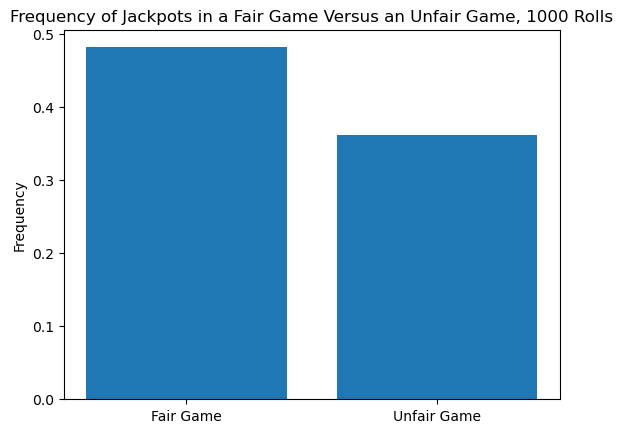

In [9]:
import matplotlib.pyplot as plt

plt.bar(['Fair Game','Unfair Game'], [fair_a.jackpot()/1000, unfair_a.jackpot()/1000])
plt.ylabel('Frequency')
plt.title('Frequency of Jackpots in a Fair Game Versus an Unfair Game, 1000 Rolls')

plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [10]:
die1 = Die(np.array([1,2,3,4,5,6]))
die2 = Die(np.array([1,2,3,4,5,6]))
die3 = Die(np.array([1,2,3,4,5,6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [11]:
die1.change_face_weight(6,5)
die1.show_face_weights()

,weights
faces,
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [12]:
die2.change_face_weight(1,5)
die2.show_face_weights()

,weights
faces,
1,5.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [13]:
fair_game = Game([die3,die3,die3,die3,die3])

fair_game.play(10000)

fair_game.show_result().head()

,0,1,2,3,4
1,3,3,6,5,5
2,3,5,3,1,1
3,4,3,6,1,3
4,2,1,5,5,4
5,5,1,2,5,1


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [14]:
unfair_game = Game([die1,die2,die3,die3,die3])

unfair_game.play(10000)

unfair_game.show_result().head()

,0,1,2,3,4
1,3,1,1,6,5
2,4,1,6,1,2
3,6,4,3,4,1
4,4,1,6,2,4
5,5,4,5,2,5


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

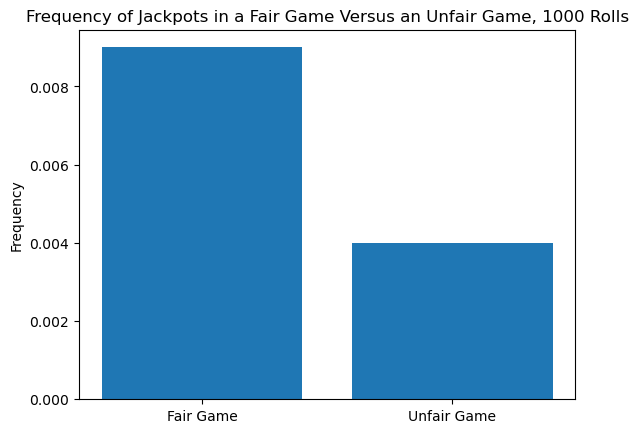

In [15]:
fair_a1 = Analyzer(fair_game)
unfair_a1 = Analyzer(unfair_game)

plt.bar(['Fair Game','Unfair Game'], [fair_a1.jackpot()/1000, unfair_a1.jackpot()/1000])
plt.ylabel('Frequency')
plt.title('Frequency of Jackpots in a Fair Game Versus an Unfair Game, 1000 Rolls')

plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [16]:
letters = {}

with open('english_letters.txt', 'r') as file:
    for line in file:
        letter, number = line.split()
        letters[letter] = int(number)

letter_die = Die(np.array(list(letters.keys())))

for letter, freq in letters.items():
    letter_die.change_face_weight(letter,freq)

letter_die.show_face_weights()


,weights
faces,
E,529117365.0
T,390965105.0
A,374061888.0
O,326627740.0
I,320410057.0
N,313720540.0
S,294300210.0
R,277000841.0
H,216768975.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [17]:
word_game = Game([letter_die,letter_die,letter_die,letter_die])

word_game.play(1000)
word_game.show_result().head()

,0,1,2,3
1,N,I,T,H
2,V,U,A,M
3,O,E,R,U
4,B,O,V,N
5,O,U,S,I


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [64]:
words = []

with open('scrabble_words.txt','r') as file:
    for line in file:
        words.append(line.split('\n')[0])

words_series = pd.Series(words)

word_a1 = Analyzer(word_game)

perms = word_a1.permutation_count().index.to_flat_index().to_series().reset_index(drop = True).apply(''.join)

print(sum(perms.isin(words_series)))

46


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [ ]:
word_game2 = Game([letter_die,letter_die,letter_die,letter_die,letter_die])

word_game2.play(1000)
word_game2.show_result().head()

word_a2 = Analyzer(word_game2)

perms2 = word_a2.permutation_count().index.to_flat_index().to_series().reset_index(drop = True).apply(''.join)

print(sum(perms2.isin(words_series)))

print(perms2[perms2.isin(words_series)])



7
185    MISER
559    DONAH
644    ANCON
706    CLOSE
778    IMINO
875    HOAST
945    HAVES
dtype: object


The game with 4 dice made 46 real words, while the game with 5 dice created just 7 real words. The four dice game produced more words.